# Predicting the sale price of bulldozers using Machine Learning 

## 1. Problem Statement


The goal of the contest was to predict the future sale price of a bulldozer given it's characteristics and previous examples of  of how much were similar bulldozers sold for.

# 2. Data

The data is downloaded from Kaggle bluebook for bulldozers competition

https://www.kaggle.com/c/bluebook-for-bulldozers/data

The data includes a trainingm validation and testing dataset.
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

# 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

More details here - https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Our goal is to build a machine learning model that minimizes the root mean squared log error. 



# 4. Features

Kaggle provides a data dictionary that contains all the features and their details.

It can be viewed here on Google Sheets.


https://docs.google.com/spreadsheets/d/1EDJN__hYt5N3vizgOMdRYeXAFUhQmfr5cvzpfzUlLnI/edit?usp=sharing

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("data\TrainandValid.csv")

C:\Users\dell\Desktop\ML and DS\bulldozer-price-prediction-project\env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [76]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

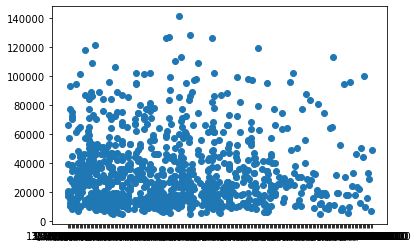

In [77]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000] ,  df['SalePrice'][:1000]);

Text(0, 0.5, 'No. of Sales')

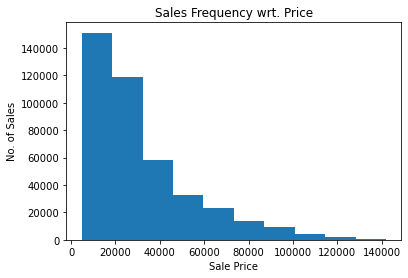

In [78]:
df.SalePrice.plot.hist();
plt.title('Sales Frequency wrt. Price')
plt.xlabel('Sale Price')
plt.ylabel('No. of Sales')

In [79]:
#Importing data again but parsing Dates for the columns which have datetime data
df = pd.read_csv("data/TrainandValid.csv" , low_memory = False , parse_dates=['saledate'])


In [80]:
df['saledate'][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
5     2008-12-18
6     2004-08-26
7     2005-11-17
8     2009-08-27
9     2007-08-09
10    2008-08-21
11    2006-08-24
12    2005-10-20
13    2006-01-26
14    2006-01-03
15    2006-11-16
16    2007-06-14
17    2010-01-28
18    2006-03-09
19    2005-11-17
20    2006-05-18
21    2006-10-19
22    2007-10-25
23    2006-10-19
24    2004-05-20
25    2006-03-09
26    2006-03-09
27    2007-02-22
28    2007-08-09
29    2006-06-01
30    2010-10-22
31    2007-03-22
32    2006-07-27
33    2010-01-28
34    2006-06-01
35    2011-06-09
36    2011-05-19
37    2004-05-20
38    2009-07-24
39    2011-06-15
40    2009-06-25
41    2010-02-25
42    2005-12-15
43    2009-07-09
44    2011-06-16
45    2006-12-14
46    2010-11-18
47    2009-08-06
48    2009-07-08
49    2006-08-24
50    2004-07-15
51    2007-04-12
52    2011-02-10
53    2005-11-17
54    2009-08-27
55    2011-02-03
56    2007-06-28
57    2011-06-02
58    2009-08-

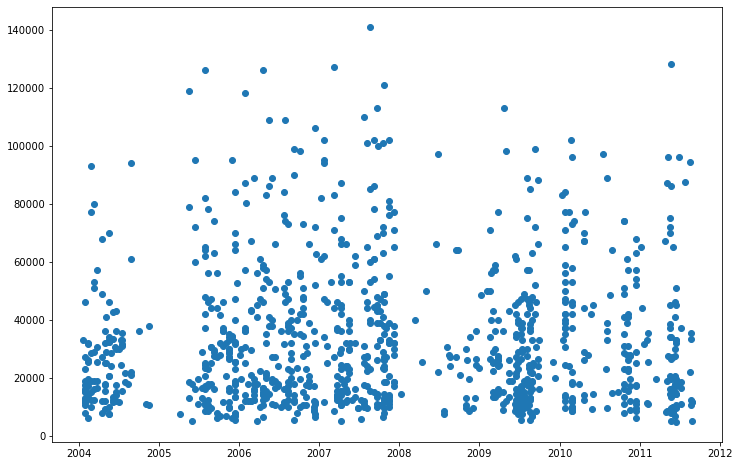

In [81]:
fig , ax = plt.subplots(figsize=(12,8))
ax.scatter(df['saledate'][:1000] , df['SalePrice'][:1000]);

In [82]:
df['saledate'].head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [83]:
#Sorting dataframe by saledate

df.sort_values('saledate', inplace=True , ascending = True)
df['saledate'].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [85]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [86]:
# Making a copy of original dataframe
df_copy = df.copy()
df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


# Adding datetime parameters for `saledate` column

In [90]:
df_copy['saleyear'] = df_copy['saledate'].dt.year
df_copy['salemonth'] = df_copy['saledate'].dt.month
df_copy['saleday'] = df_copy['saledate'].dt.day
df_copy['saledayofweek'] = df_copy['saledate'].dt.dayofweek
df_copy['saledayofyear'] = df_copy['saledate'].dt.dayofyear

In [97]:
df_copy.tail()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,D38E,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,4,28,5,119
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,337G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
409203,6283635,34000.0,1869284,4701,149,99.0,1000,NaN,NaN,544H,...,NaN,NaN,NaN,Standard,Conventional,2012,4,28,5,119


In [98]:
#Now we won't be using our 'saledate' column hence we will drop it
df_copy.drop('saledate' , axis = 1 , inplace=True)

KeyError: "['saledate'] not found in axis"

In [99]:
#Checking values of different columns
df_copy['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [100]:
df_copy['YearMade'].value_counts()

1000    39391
2005    22096
1998    21751
2004    20914
1999    19274
        ...  
1942        1
1949        1
2012        1
2013        1
1947        1
Name: YearMade, Length: 73, dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 1

###  Converting string type data to numerical data

In [102]:
# We have multiples parameters which are string type. 
# Here we'll use pandas hybrid datatype 'category' to 
# access the data as in numerical for but still keeping it original 

for label , content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        df_copy[label] = content.astype("category").cat.as_ordered()


In [103]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [104]:
df_copy['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [105]:
df_copy['state'].cat.codes 

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [106]:
#Checking what percentaage of data is missing data.
md_per = (df_copy.isna().sum()/len(df_copy))*100
md_per

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

# Saving preprocessed Data


In [107]:
df_copy.to_csv('data/in-between-saves/df_copy_save_1.csv')

# Filling missing values

In [108]:
#First we will be filling numeric data.

for label , content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Adding a binary column which tells us which data was missing 
            df_copy[label+'_is_missing'] = pd.isnull(content)
            #Filling missing numeric values with median
            df_copy[label] = content.fillna(content.median())
        

In [109]:
# Checking is any numeric value is still missing
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(content)
        else:
            print(label + ": No missing data")

SalesID: No missing data
SalePrice: No missing data
MachineID: No missing data
ModelID: No missing data
datasource: No missing data
auctioneerID: No missing data
YearMade: No missing data
MachineHoursCurrentMeter: No missing data
saleyear: No missing data
salemonth: No missing data
saleday: No missing data
saledayofweek: No missing data
saledayofyear: No missing data
auctioneerID_is_missing: No missing data
MachineHoursCurrentMeter_is_missing: No missing data


In [110]:
df_copy['auctioneerID_is_missing'].value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [111]:
df_copy.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [112]:
#Filling and turning categorical data into numerical data
for label , content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)
        

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [113]:
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Adding binary column to show what values were missing before getting filled
        df_copy[label+"_is_missing"] = pd.isnull(content)
        #Turning categories into numbers and add+1
        df_copy[label] = pd.Categorical(df_copy[label]).codes + 1

In [114]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 97.2 MB


In [115]:
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [116]:
pd.set_option('display.max_rows', None)
df_copy.isna().sum()

SalesID                                0
SalePrice                              0
MachineID                              0
ModelID                                0
datasource                             0
auctioneerID                           0
YearMade                               0
MachineHoursCurrentMeter               0
UsageBand                              0
fiModelDesc                            0
fiBaseModel                            0
fiSecondaryDesc                        0
fiModelSeries                          0
fiModelDescriptor                      0
ProductSize                            0
fiProductClassDesc                     0
state                                  0
ProductGroup                           0
ProductGroupDesc                       0
Drive_System                           0
Enclosure                              0
Forks                                  0
Pad_Type                               0
Ride_Control                           0
Stick           

# Modelling


Now that our data has no missing values and all the catergorical values have been converted into numbers, we will be performing some model-driven EDA.

In [117]:
df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [129]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
df_train = df_copy[df_copy.saleyear < 2012]
df_valid = df_copy[df_copy.saleyear == 2012]

In [126]:
len(df_train) , len(df_valid)

(401125, 11573)

In [127]:
X_train , y_train = df_train.drop('SalePrice' , axis =1) , df_train['SalePrice']
X_valid , y_valid = df_valid.drop('SalePrice' , axis =1) , df_valid['SalePrice']

In [135]:
from sklearn.metrics import mean_squared_log_error , mean_absolute_error , r2_score

def rmsle(y_test , y_preds):
    
    """
    calcutes root mean squared log error between predictions and true labels
    
    """
    return np.sqrt(mean_squared_log_error(y_test , y_preds))

#Creating function to evaluate model on different levels.

def show_score(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    
    scores = {"MSE (Train)" : mean_absolute_error(y_train, train_preds),
              "MSE (Valid)" : mean_absolute_error(y_valid , valid_preds),
              "RMSLE (Train)" : rmsle(y_train, train_preds),
              "RMSLE (Valid)" : rmsle(y_valid , valid_preds),
              "R^2 (Train)" : r2_score(y_train, train_preds), 
              "R^2 (Valid)" : r2_score(y_valid , valid_preds)}
    return scores


# Testing our model on a subset to tune hyperparameters

In [131]:
model = RandomForestRegressor(n_jobs=-1 , random_state=42 , max_samples=10000)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [133]:
model.fit(X_train, y_train)


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [136]:
show_score(model)

{'MSE (Train)': 5561.2988092240585,
 'MSE (Valid)': 7177.26365505919,
 'RMSLE (Train)': 0.257745378256977,
 'RMSLE (Valid)': 0.29362638671089003,
 'R^2 (Train)': 0.8606658995199189,
 'R^2 (Valid)': 0.8320374995090507}

In [150]:
#Hyperparameter Tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Different RandomForestRegressor hyperparameters 
rf_grid = {"n_estimators" : np.arange(10,100,10),
           "max_depth" : [None , 3 ,5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": [0.5 ,1, 'sqrt' , 'auto']}

rs_model = RandomizedSearchCV(model , 
                              param_distributions = rf_grid, 
                              n_iter=20,
                             cv=5,
                             verbose=True)


In [151]:
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_samples=10000, n_jobs=-1,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [153]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': None}

In [158]:
#Creating a Random Forest Regressor model with the best found parameters
best_model = RandomForestRegressor(n_estimators = 40,
                                  min_samples_split = 8,
                                  min_samples_leaf = 1,
                                  max_features = 0.5,
                                  max_depth = None,
                                  n_jobs = -1,
                                  max_samples=None)

In [159]:
best_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=8, n_estimators=40,
                      n_jobs=-1)

In [160]:
show_score(best_model)

{'MSE (Train)': 2382.6763323669593,
 'MSE (Valid)': 5936.332263248319,
 'RMSLE (Train)': 0.12063306662035239,
 'RMSLE (Valid)': 0.24660778977219752,
 'R^2 (Train)': 0.9724712876370524,
 'R^2 (Valid)': 0.8827881304905456}

As we know that the evaluation metric for this competition was the RMSLE (root mean squared log error) between the actual and predicted auction prices.

Our model is able to minimize the `root mean square log error` to a value of `0.246` which is the under the top 35 competitors who took part in the contest. 

# Preprocessing the test data

In [228]:
#Importing data again but parsing Dates for the columns which have datetime data
df = pd.read_csv("data/Test.csv" , low_memory = False , parse_dates=['saledate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [229]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleyear"] = df.saledate.dt.year
    df["salemonth"] = df.saledate.dt.month
    df["saleday"] = df.saledate.dt.day
    df["saledayofweek"] = df.saledate.dt.dayofweek
    df["saledayofyear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [230]:
df_test = preprocess_data(df)

In [231]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [232]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [233]:
df_test['auctioneerID_is_missing'] = False

In [237]:
df_test.columns.shape , X_train.columns.shape

((102,), (102,))

In [239]:
test_preds = best_model.predict(df_test)

In [258]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds[:10]

,SalesID,SalePrice
0,1227829,19873.821897
1,1227844,20902.220148
2,1227847,52640.565580
3,1227848,75233.681631
4,1227863,41950.288843
5,1227870,31870.071734
6,1227871,27328.928016
7,1227879,12452.973193
8,1227880,22113.651342
9,1227881,37950.438797


## Feature Importance

Since we've built a model which is able to make predictions. The people you share these predictions with (or yourself) might be curious of what parts of the data led to these predictions.

This is where **feature importance** comes in. Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable**.


In [242]:
# Find feature importance of our best model
best_model.feature_importances_

array([3.58379696e-02, 2.06049877e-02, 4.41539793e-02, 2.14087693e-03,
       4.09179712e-03, 2.04343624e-01, 3.45978243e-03, 1.24857817e-03,
       3.76368239e-02, 5.30864968e-02, 6.25253134e-02, 4.67721271e-03,
       2.12056144e-02, 1.58920232e-01, 4.32265347e-02, 7.42824591e-03,
       1.86011882e-03, 3.13979631e-03, 3.55178884e-03, 4.76047820e-02,
       3.78077648e-04, 4.86801066e-05, 8.08184759e-04, 1.63756170e-04,
       1.28649431e-03, 2.96559523e-05, 2.39696495e-03, 1.59351463e-02,
       2.61514049e-04, 3.96600385e-03, 2.62159776e-03, 1.84568929e-03,
       4.29996323e-03, 1.66173516e-04, 8.95173967e-04, 7.68914562e-03,
       9.53819464e-04, 8.94399155e-03, 3.00457529e-03, 1.26464724e-03,
       8.90054187e-04, 1.05728165e-03, 3.25042419e-03, 6.80493464e-04,
       4.60710217e-04, 4.62568643e-04, 5.07007996e-04, 2.19255330e-03,
       9.42741200e-04, 2.58821955e-04, 1.74002173e-04, 7.34974381e-02,
       4.74561954e-03, 7.45125679e-03, 3.81466185e-03, 1.17409605e-02,
      

In [254]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    plt.figure(figsize=(16, 9))
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

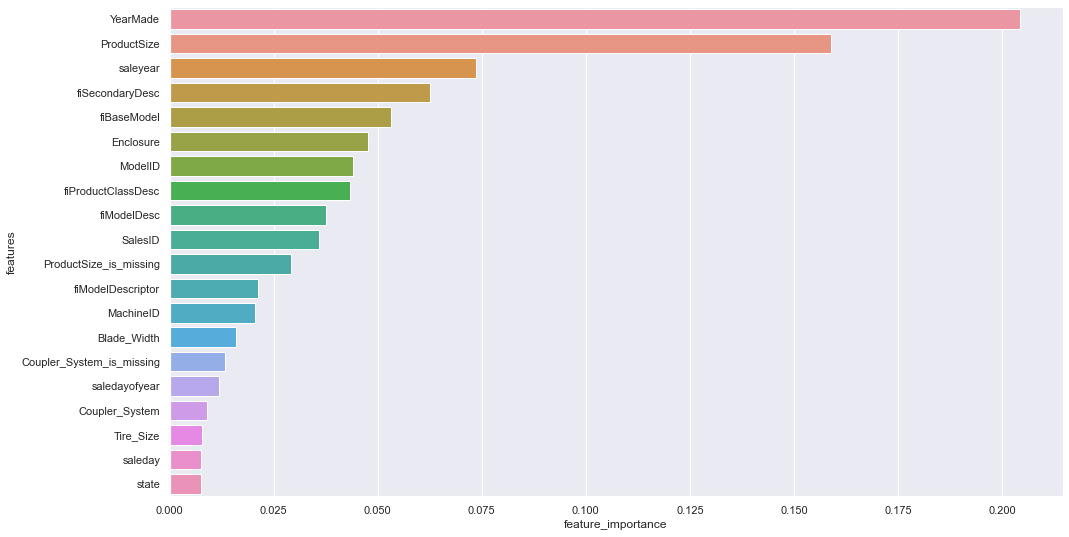

In [255]:
plot_features(X_train.columns, best_model.feature_importances_)